<h1><center>HW2 Problem 5c</center></h1>

To start, we'll import `numpy` and `babypandas`. Please do not import any other packages.

In [1]:
import numpy as np
import babypandas as bpd

You'll need to fill in the following two functions with your answers from part (b). Before you do this, we recommend reading through the rest of the code so you understand what these functions should do and how they will be used.

In [2]:
def m_gradient_func(x_i, y_i, m, b, n):
    '''Return the single term in the gradient of m corresponding to (x_i, y_i).'''
    return ...

In [3]:
def b_gradient_func(x_i, y_i, m, b, n): 
    '''Return the single term in the gradient of b corresponding to (x_i, y_i).'''
    return ...

Now we will define some additional functions in order to be able to perform gradient descent. Make sure that you read through this code and understand what it is doing. Feel free to ask questions about the following code in office hours, but do not modify any code unless instructed.

In [4]:
def gradient_descent_iteration(m, b, x_data, y_data, learningRate):
    '''Perform one iteration of gradient descent on the given data.'''
    m_gradient, b_gradient = 0, 0
    n = len(x_data)
    for i in range(n):
        m_gradient += m_gradient_func(x_data[i], y_data[i], m, b, n)
        b_gradient += b_gradient_func(x_data[i], y_data[i], m, b, n)
    new_m = m - learningRate * m_gradient
    new_b = b - learningRate * b_gradient
    return new_m, new_b

In [5]:
def gradient_descent(x_data, y_data, m_initial, b_initial, learning_rate, max_iterations):
    '''Perform gradient descent on the given data, using the given parameters.'''
    m = m_initial
    b = b_initial
    num_iterations = 0
    while num_iterations < max_iterations:
        m, b = gradient_descent_iteration(m, b, x_data, y_data, learning_rate)
        num_iterations += 1
        if(num_iterations%1000==0):
            print("After ", num_iterations, " iterations, m =", m, "and b = ", b)
    return m, b

At this point, we are ready to use our gradient descent algorithm. We'll work with a dataset of 300 random recipes from [Epicurious](https://www.epicurious.com/). For each recipe, we have its title and nutritional information.

In [6]:
recipes = bpd.read_csv('epicurious.csv')
recipes

,title,rating,calories,protein,fat,sodium
0,Mushroom and Brown Rice Veggie Burger,4.375,859.0,35.0,30.0,1018.0
1,Beer-Marinated Steaks with Peppercorn Sauce,4.375,1016.0,70.0,67.0,678.0
2,Beef Pinwheels with Arugula Salad,4.375,546.0,53.0,35.0,1127.0
3,Poppy Seed Chocolate Torte,2.500,231.0,5.0,14.0,40.0
4,Melon with Green-Peppercorn Raspberry Sauce,2.500,265.0,4.0,4.0,91.0
...,...,...,...,...,...,...
295,Caramelized Potatoes,3.750,137.0,2.0,3.0,492.0
296,Haroseth,5.000,273.0,4.0,13.0,4.0
297,Caribbean-Style Black Bean and Rice Salad,3.750,323.0,7.0,19.0,132.0
298,Dijon and Tarragon Grilled Chicken,4.375,1134.0,82.0,84.0,514.0


We are interested in determining how the amount of `'fat'` varies with the number of `'calories'`. This means we'll use `'calories'`as our $x$ variable and `'fat'` as our $y$. We'll extract these as arrays.

In [7]:
x_data = recipes.get('calories').values
y_data = recipes.get('fat').values

We've set the learning rate and initial predictions for you, as well as the number of iterations we want to do. Run the next cell to start your gradient descent algorithm. 

In [8]:
learning_rate = 0.0000004
m_initial, b_initial = 0, 0
max_iterations = 10000

print("Performing linear regression with gradient descent...")
m, b = gradient_descent(x_data, y_data, m_initial, b_initial, learning_rate, max_iterations)
print("Gradient descent completed.")
print("The slope is m =", m)
print("The y-intercept is b =", b)

Performing linear regression with gradient descent...
After  1000  iterations, m = 0.05942135354003322 and b =  -0.0006066747975734924
After  2000  iterations, m = 0.059422044331360925 and b =  -0.0012745471855237962
After  3000  iterations, m = 0.05942273485162615 and b =  -0.001942157504252416
After  4000  iterations, m = 0.059423425100935255 and b =  -0.0026095058565937844
After  5000  iterations, m = 0.059424115079394574 and b =  -0.0032765923453419873
After  6000  iterations, m = 0.059424804787110375 and b =  -0.003943417073250763
After  7000  iterations, m = 0.05942549422418889 and b =  -0.0046099801430335395
After  8000  iterations, m = 0.05942618339073633 and b =  -0.005276281657363432
After  9000  iterations, m = 0.059426872286858855 and b =  -0.005942321718873261
After  10000  iterations, m = 0.05942756091266255 and b =  -0.006608100430155601
Gradient descent completed.
The slope is m = 0.05942756091266255
The y-intercept is b = -0.006608100430155601


Let's see how the regression line found by gradient descent looks. Run the next cell to see a plot of the data and the line found by gradient descent. Check that it looks reasonable.

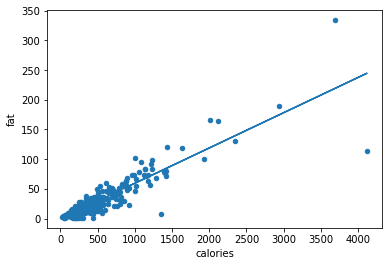

In [10]:
recipes.plot(kind='scatter', x='calories', y='fat').plot(x_data, m * x_data + b);

**To submit**: Scroll up to the cell whose output starts with `Performing linear regression with gradient descent...`. Take a screenshot of that output and a screenshot of the plot above. Submit both of these along with the rest of Homework 2, in the same document as the rest of your work. We will not be collecting or grading your code for this homework assignment.